<a href="https://colab.research.google.com/github/iqbalhanif/NN-with-Keras/blob/master/covid_detection_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

#ekstraksi Dataset
!unzip "/content/drive/My Drive/Health/covid-dataset/covid.zip" -d "/content/drive/My Drive/Health/covid-dataset/covid19/"


Mounted at /content/drive
Archive:  /content/drive/My Drive/Health/covid-dataset/covid.zip
replace /content/drive/My Drive/Health/covid-dataset/covid19/covid/000001-12.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
#ekstraksi Dataset
!unzip "/content/drive/My Drive/Health/covid-dataset/normal.zip" -d "/content/drive/My Drive/Health/covid-dataset/normal/"

Archive:  /content/drive/My Drive/Health/covid-dataset/normal.zip
replace /content/drive/My Drive/Health/covid-dataset/normal/normal/IM-0001-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


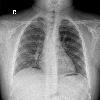

In [ ]:
import os, re, glob, cv2, numpy as np
from google.colab.patches import cv2_imshow

im = cv2.imread('/content/drive/My Drive/Health/covid-dataset/normal/normal/IM-0766-0001.jpeg')
im = cv2.resize(im,(100,100))
cv2_imshow(im)

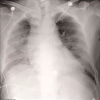

In [ ]:
im = cv2.imread('/content/drive/My Drive/Health/covid-dataset/covid19/covid/yxppt-2020-02-19_00-51-27_287214-day12.jpg')
im = cv2.resize(im,(100,100))
cv2_imshow(im)

In [ ]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/drive/My Drive/Health/covid-dataset/covid19/')
label = 1
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/Health/covid-dataset/covid19/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(70,70))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X_covid = np.array(X)
y_covid = np.array(y);

Jumlah covid : 660


In [ ]:
y_covid

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
dirs = os.listdir('/content/drive/My Drive/Health/covid-dataset/normal/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/Health/covid-dataset/normal/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(70,70))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X_normal = np.array(X)
y_normal = np.array(y);

Jumlah normal : 666


In [ ]:
y_normal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y1 = np.concatenate((y_covid, y_normal), axis=0)
y2 = np.concatenate((y_normal, y_covid), axis=0)
y = np.vstack((y1,y2)).transpose()
X = np.concatenate((X_covid, X_normal), axis=0)

In [ ]:
X[10:]

array([[[[ 61,  61,  61],
         [ 53,  53,  53],
         [ 53,  53,  53],
         ...,
         [  3,   3,   3],
         [  5,   5,   5],
         [  6,   6,   6]],

        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  2,   2,   2],
         [  1,   1,   1],
         [  1,   1,   1]],

        ...,

        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [ 74,  74,  74],
         [ 42,  42,  42],
         [  7,   7,   7]],

        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [ 68,  68,  68],
         [ 39,  39,  39],
         [  9,   9,   9]],

        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [ 57,  57,  57],
        

In [ ]:
y[10:]

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(70,70,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(2, activation='softmax')) #softmax works

In [ ]:
from keras.optimizers import SGD
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)              